# Task 1:
### By considering the data dictionary file, do exploratory data analysis on the data (i.e. Histogram, Scatter plots, Boxplots, Outlier detection, missing values identification etc).

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load loangrant.csv and display basic df information along with .head()

In [ ]:
# Load the dataset
df = pd.read_csv("loangrant.csv")

# Display basic information about the dataset
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

<ipython-input-23-48dc2ffba7d0>:2: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loangrant.csv")


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


Some further information:

In [ ]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,1.111070e+05,89769.000000,8.976900e+04,111107.000000,52104.000000,111107.000000,111107.000000,1.111070e+05,110879.00000,111096.000000
mean,1.147718e+07,1075.795029,7.248600e+04,18.201003,34.902272,11.125105,0.168027,1.548314e+04,0.11766,0.029353
std,3.185508e+07,1474.133505,5.593094e+04,7.014495,21.970696,5.010267,0.484212,1.982115e+04,0.35142,0.260575
min,4.910000e+02,585.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000
25%,8.162000e+03,705.000000,4.468800e+04,13.500000,16.000000,8.000000,0.000000,5.905000e+03,0.00000,0.000000
50%,1.418300e+04,724.000000,6.175200e+04,16.900000,32.000000,10.000000,0.000000,1.102700e+04,0.00000,0.000000
75%,2.382200e+04,741.000000,8.688700e+04,21.700000,51.000000,14.000000,0.000000,1.933800e+04,0.00000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,15.000000,1.730472e+06,7.00000,15.000000


Now, from the above, we can see that column 10 (monthly debt) and column 16 (max open credit) have mixed types, indicating some erroneous data. We will deal with this.

Similarly, columns 5, 6, 8, 12, 17, 18 have null values.

Moreover, some of the fields have mean and max values with too much distance, indicating a large number of outliers, which will be discussed later.

**The following is some more comprehensive missing data information:**

In [ ]:
missing_values = df.isnull().sum() # for each column, count the total num of empty rows
missing_percentage = (missing_values / len(df)) * 100 # convert count into percentage
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}) # create a new df that stores missing value count and percentage for each field
missing_df[missing_df['Missing Values'] > 0] # show those fields whose missing value count > 0

,Missing Values,Percentage
Credit Score,21338,19.204911
Years in current job,4693,4.223856
Annual Income,21338,19.204911
Months since last delinquent,59003,53.104665
Bankruptcies,228,0.205208
Tax Liens,11,0.009900


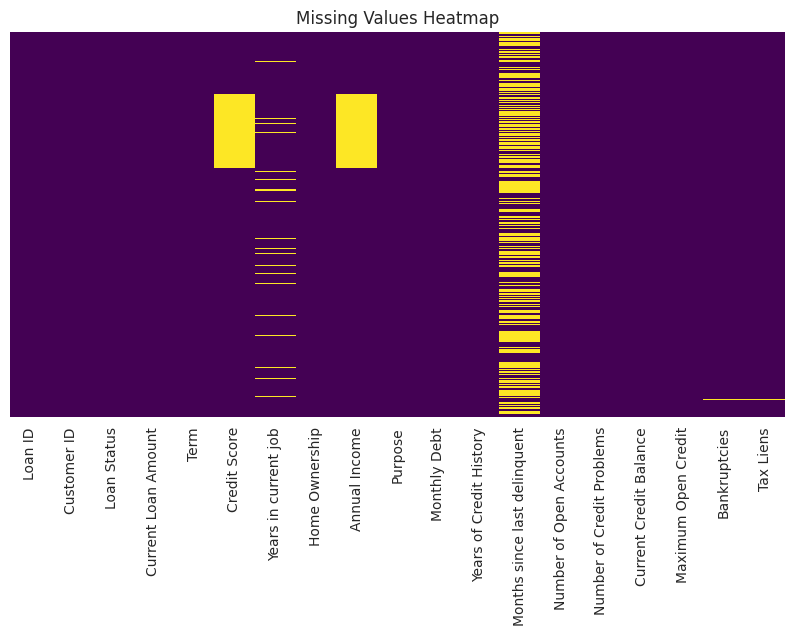

In [ ]:
plt.figure(figsize=(10,5)) # define figure size
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False) # create a heatmap
plt.title("Missing Values Heatmap")
plt.show()

The above visualization shows that Credit Score, Years in Current Job, Annual Income, and Month since last delinquent have missing values.

##Task 2

We will now replace missing values with the appropriate value (central tendency or otherwise). Similarly, we will convert those columns that are being detected as "object" types to the correct format, which is numeric.

In [ ]:
# Convert numeric fields that might have been read as object types
df["Credit Score"] = pd.to_numeric(df["Credit Score"], errors="coerce").astype("Int64")
df["Annual Income"] = pd.to_numeric(df["Annual Income"], errors="coerce")
df["Bankruptcies"] = pd.to_numeric(df["Bankruptcies"], errors="coerce").astype("Int64")
df["Tax Liens"] = pd.to_numeric(df["Tax Liens"], errors="coerce").astype("Int64")

# Fill missing values

# Because median is more resistant to outliers
df["Credit Score"].fillna(int(df["Credit Score"].median()), inplace=True)

# Because the values are categoric (> X, < Y, etc.),
# replace with mode as this is the most sensible form of "average" as well
# as for ease
df["Years in current job"].fillna(df["Years in current job"].mode()[0], inplace=True)

# same reason as above
df["Annual Income"].fillna(df["Annual Income"].median(), inplace=True)

# Values are either int or NA. It makes more sense to replace with NA,
# as this suggests that no delinquencies were recorded meaning that
# these values are missing
df["Months since last delinquent"].fillna("NA", inplace=True)

# same reason as above
df["Bankruptcies"].fillna(int(df["Bankruptcies"].median()), inplace=True)

# same reason as above
df["Tax Liens"].fillna(int(df["Tax Liens"].median()), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  111107 non-null  Int64  
 6   Years in current job          111107 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 111107 non-null  float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  111107 non-nul

<ipython-input-27-22f984d84c2b>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Credit Score"].fillna(int(df["Credit Score"].median()), inplace=True)
<ipython-input-27-22f984d84c2b>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

For numeric data, histograms and boxplots were plotted.

For categorical data, either piecharts or barplots were used.

Note, scatterplots were skipped since there will be correlation analysis in Task 4.

In [ ]:
# Convert "Months since last delinquent" correctly
df["Months since last delinquent"] = df["Months since last delinquent"].replace("NA", 0)  # Replace "NA" with NaN

# convert this column to numeric type
df["Months since last delinquent"] = pd.to_numeric(df["Months since last delinquent"], errors="coerce")

# Convert all numeric columns properly
numeric_columns = [
    "Current Loan Amount", "Credit Score", "Annual Income", "Monthly Debt",
    "Years of Credit History", "Months since last delinquent", "Number of Open Accounts",
    "Number of Credit Problems", "Current Credit Balance", "Maximum Open Credit",
    "Bankruptcies", "Tax Liens"
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # Convert non-numeric values to NaN

# Set style for plots
sns.set_style("whitegrid")

<ipython-input-28-f09816498570>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Months since last delinquent"] = df["Months since last delinquent"].replace("NA", 0)  # Replace "NA" with NaN


Plotting histograms

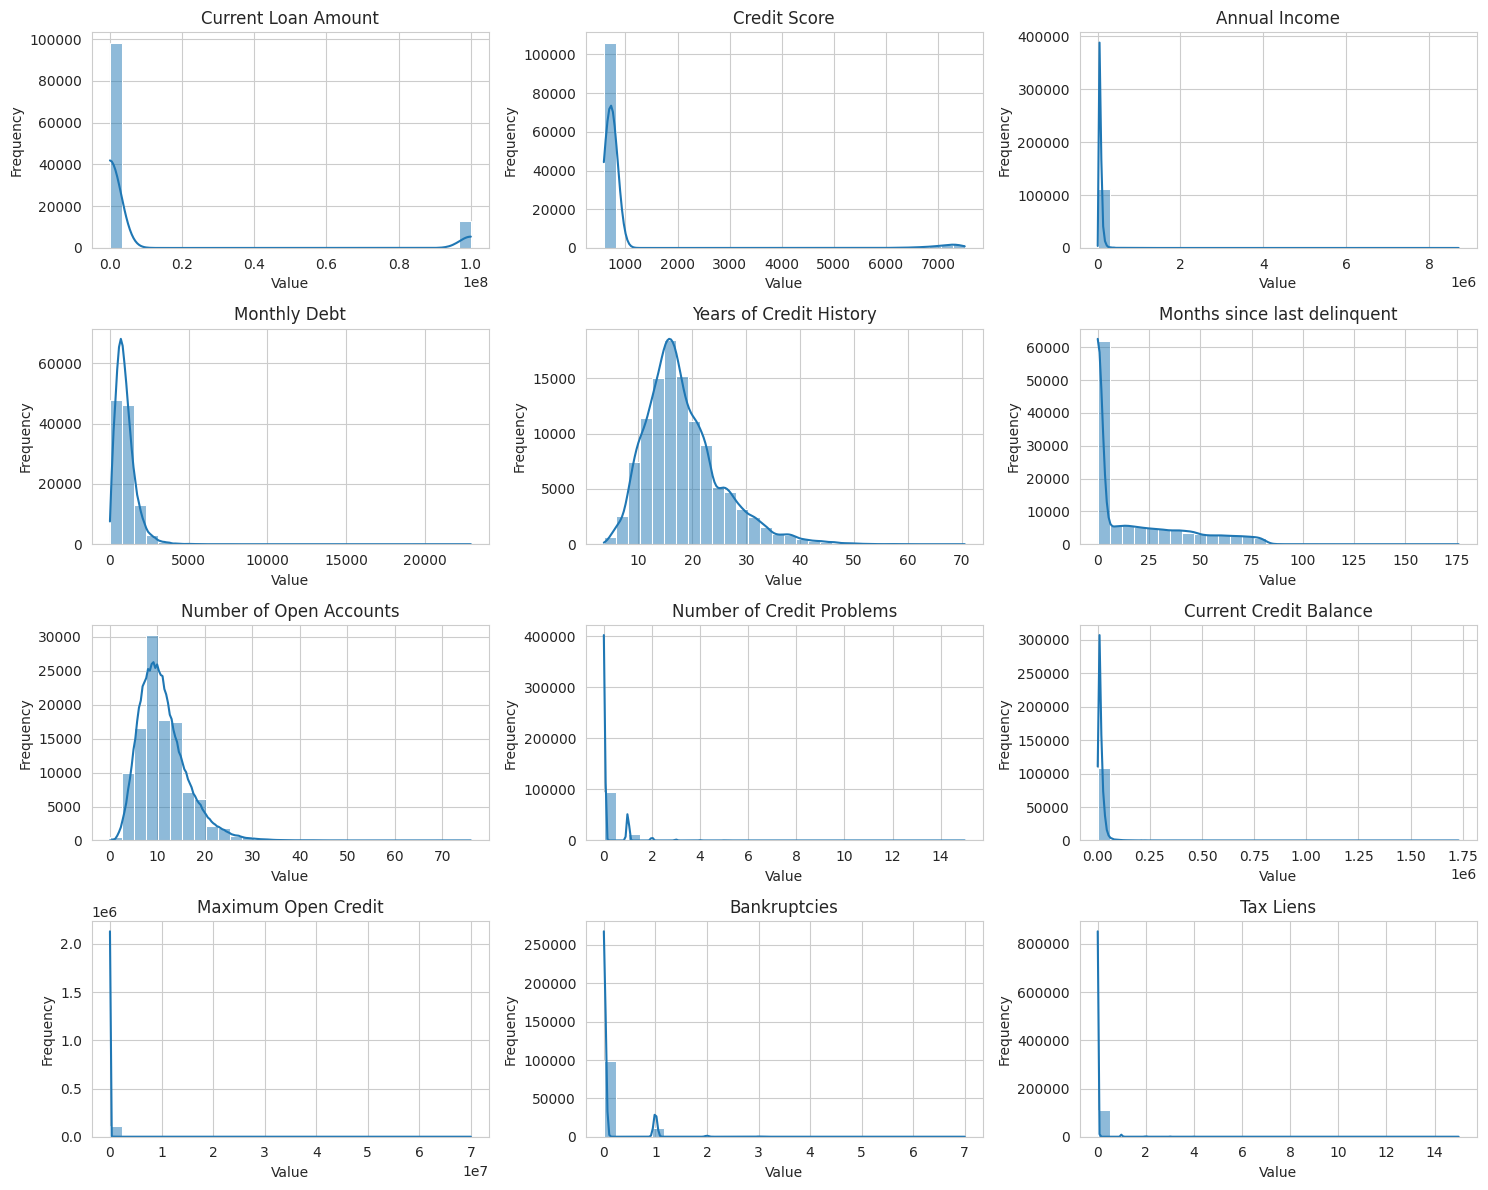

In [ ]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(col)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Plotting boxplots

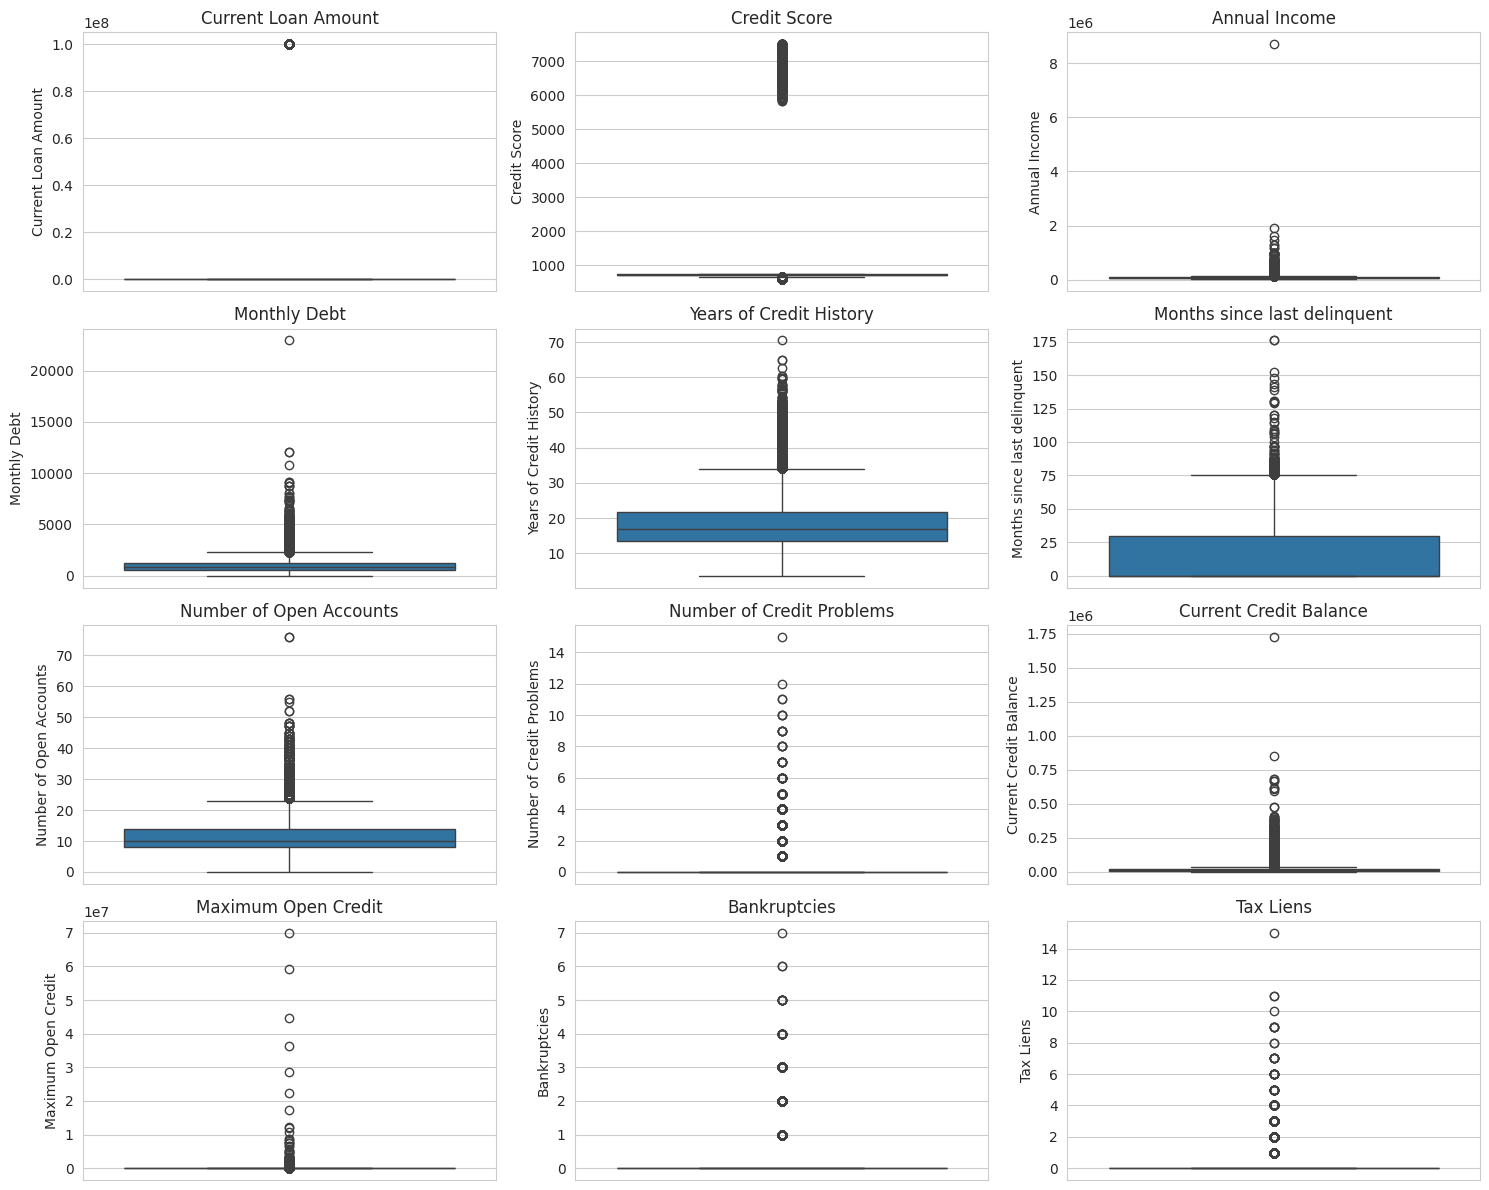

In [ ]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Plotting barplots

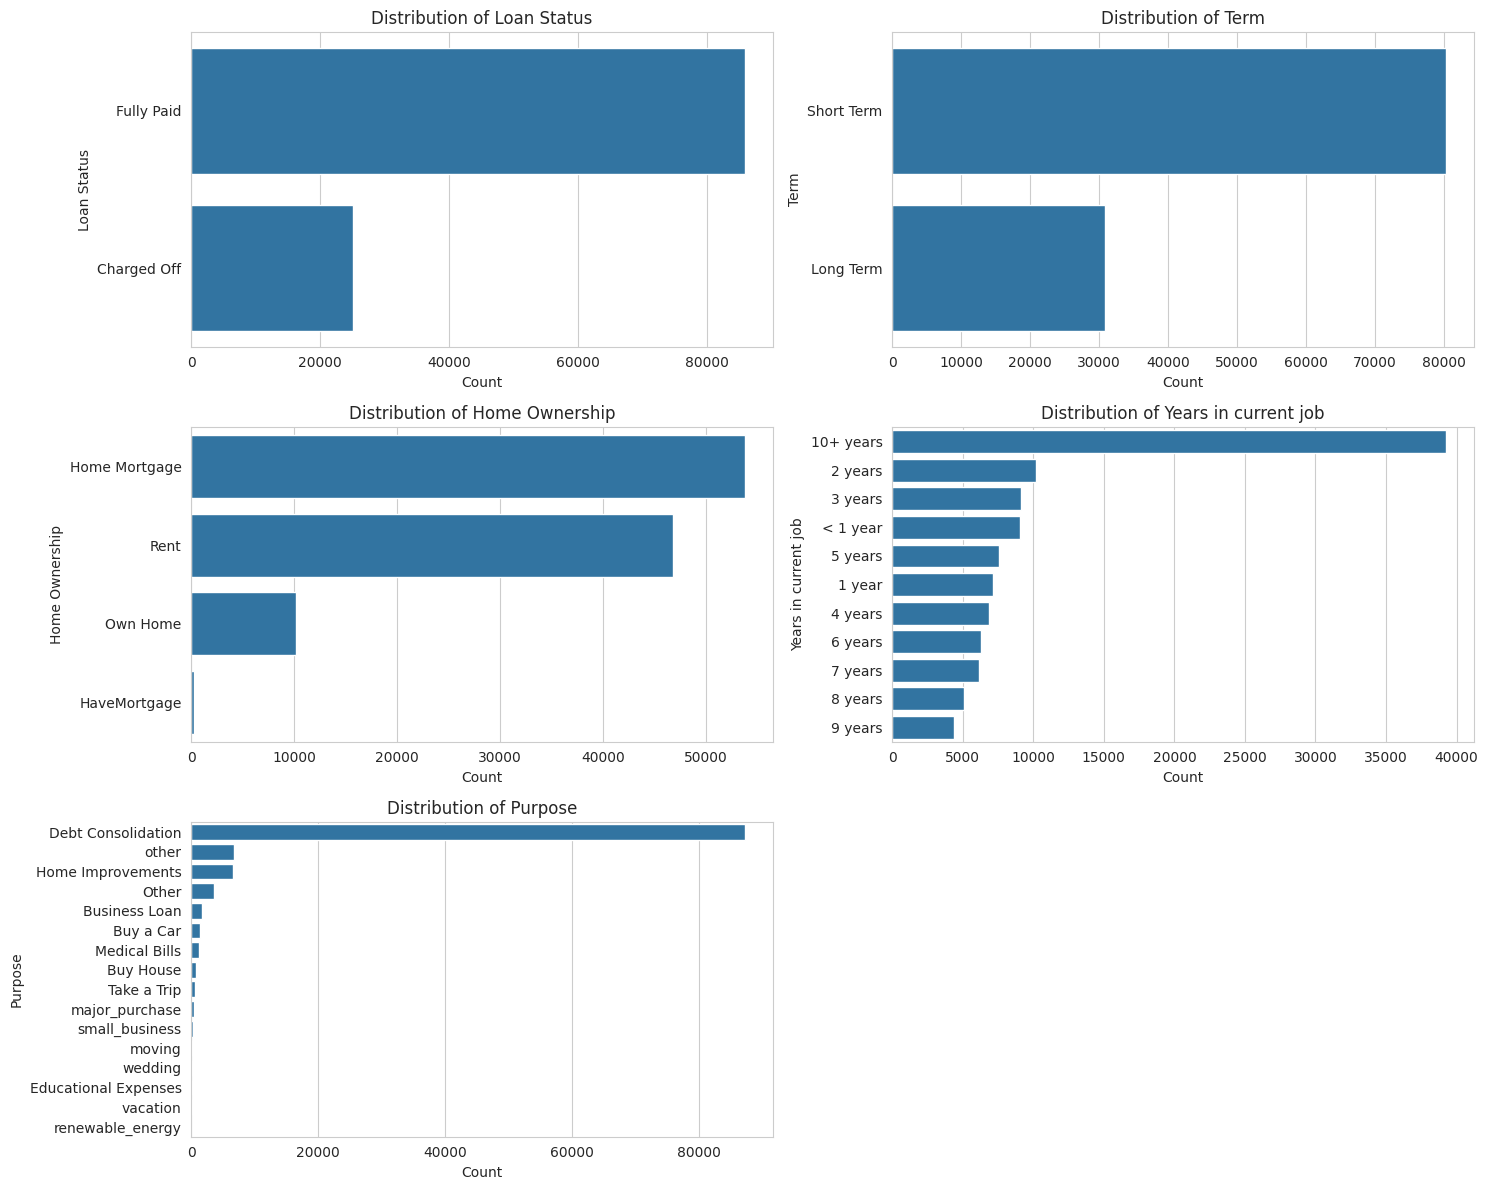

In [ ]:
categorical_columns = ["Loan Status", "Term", "Home Ownership", "Years in current job", "Purpose"]

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

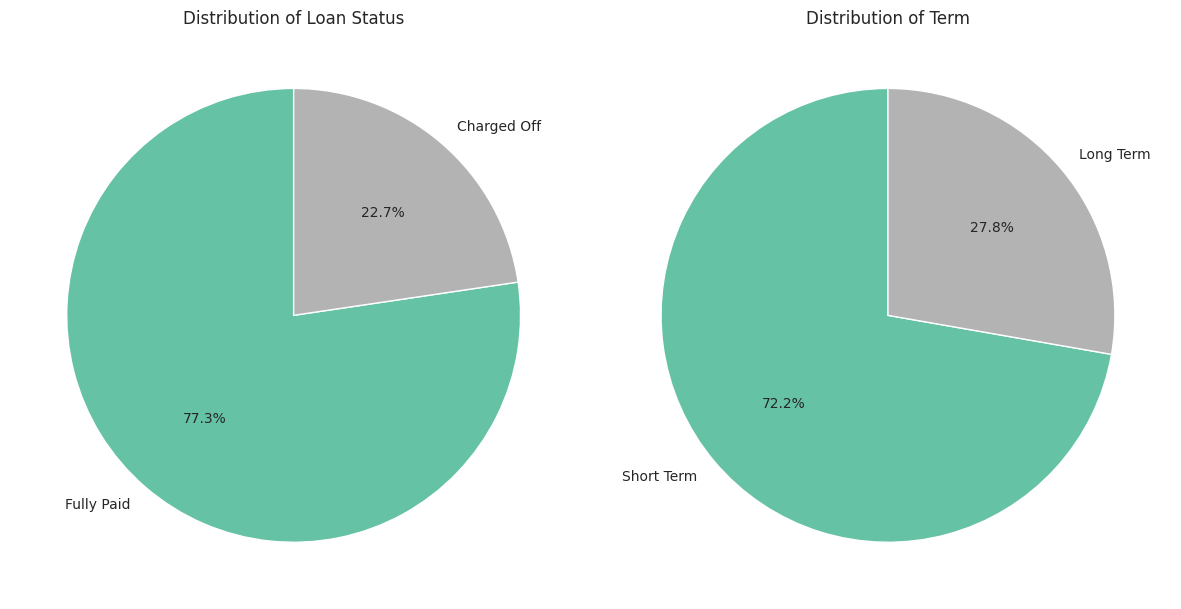

In [ ]:
pie_columns = ["Loan Status", "Term"]

plt.figure(figsize=(12, 6))
for i, col in enumerate(pie_columns):
    plt.subplot(1, 2, i+1)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap="Set2")
    plt.title(f"Distribution of {col}")
    plt.ylabel("")  # Remove y-label for clarity

plt.tight_layout()
plt.show()

### **The following is what we can understand from the visualizations, and analyzed data:**

**Current Loan Amount:** Highly skewed, with a mean of 11,477,180 and a median of 14,183, indicating a few extremely large loan amounts.

**Credit Score:** Slightly skewed, with a mean of 1008 and a median of 724, indicating some outliers.

**Annual Income:** Skewed, with a mean of 70,424 and a median of 61,752, showing a concentration of incomes in the lower range with some high earners.

**Monthly Debt:** Skewed, with a mean of 972 and a median of 853, indicating a concentration of borrowers with lower monthly debt amounts.

**Years of Credit History:** Skewed, with a mean of 18.2 and a median of 16.9, suggesting that most borrowers have moderate credit history, with a few having very long credit histories.

**Months Since Last Delinquent:** Skewed, with a mean of 16.37 and a median of 0, implying that many borrowers have no recent delinquencies.

**Number of Open Accounts:** Skewed, with a mean of 11.13 and a median of 10, most borrowers have a moderate number of open accounts.

**Number of Credit Problems:** Skewed, with a mean of 0.17 and a median of 0, indicating that most borrowers have no credit problems.

**Current Credit Balance:** Skewed, with a mean of 15,483 and a median of 11,027, suggesting that a few borrowers carry significantly high balances.

**Maximum Open Credit:** Skewed, with a mean of 34,386 and a median of 21,243, implying that some borrowers have access to significantly large credit limits.

**Bankruptcies:** Skewed, with a mean of 0.12 and a median of 0, indicating that most borrowers have never filed for bankruptcy.

**Tax Liens:** Skewed, with a mean of 0.03 and a median of 0, suggesting that tax liens are rare.

# Task 2:
### Find the missing values of every attribute and replace it with the appropriate central tendency. However, the replacement with central should be justified.

Already done above, prior to plotting graphs

# Task 3:

### Find the outliers using boxplot and by employing the outliers formula (quartiles and IQR) and report how many percentage of data having outliers. Moreover, you need to replace outliers with the appropriate central tendency (may be median).

Note, there will be some repeat code. The following converts "Months since last delinquent" to numeric type, and replaces missing "NA" with 0s

In [ ]:
# Convert "Months since last delinquent" correctly
df["Months since last delinquent"] = df["Months since last delinquent"].replace("NA", 0)
df["Months since last delinquent"] = pd.to_numeric(df["Months since last delinquent"], errors="coerce")

# Convert numeric columns properly
numeric_columns = [
    "Current Loan Amount", "Credit Score", "Annual Income", "Monthly Debt",
    "Years of Credit History", "Months since last delinquent", "Number of Open Accounts",
    "Number of Credit Problems", "Current Credit Balance", "Maximum Open Credit",
    "Bankruptcies", "Tax Liens"
]

The following shows the boxplots before outlier removal

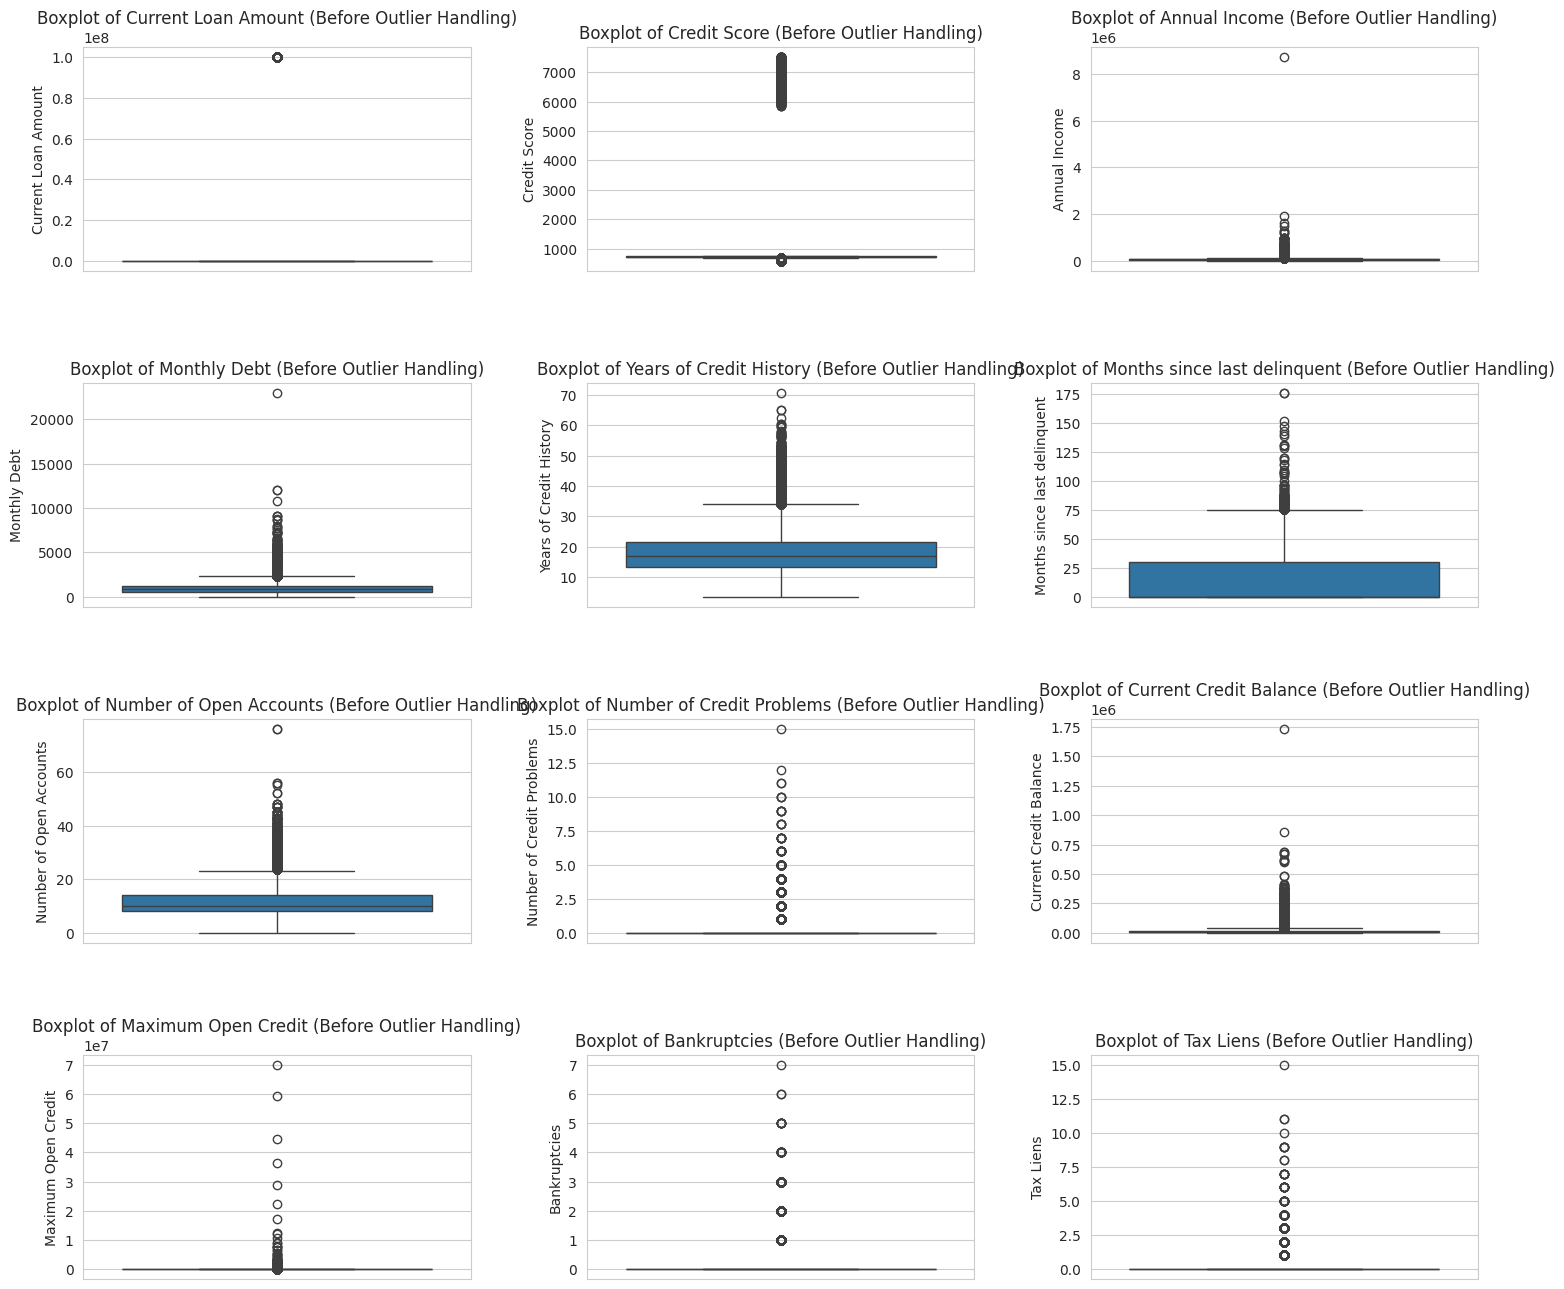

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axes = axes.flatten()  # Flatten axes array

for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col} (Before Outlier Handling)", fontsize=12)
    axes[i].set_ylabel(col, fontsize=10)

fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Increase spacing
plt.show()

Following code is for outlier detectiong via the IQR method. The outliers are replaced with the median values, since the median is resistant to outliers. The data is then plotted

In [ ]:
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

outlier_counts = {}  # Store the percentage of outliers for each column

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    outlier_counts[col] = round(outlier_percentage, 2)  # Store percentage

    # Replace outliers with the median
    median_value = df[col].median()
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_value, df[col])

The following shows the boxplots after outlier removal

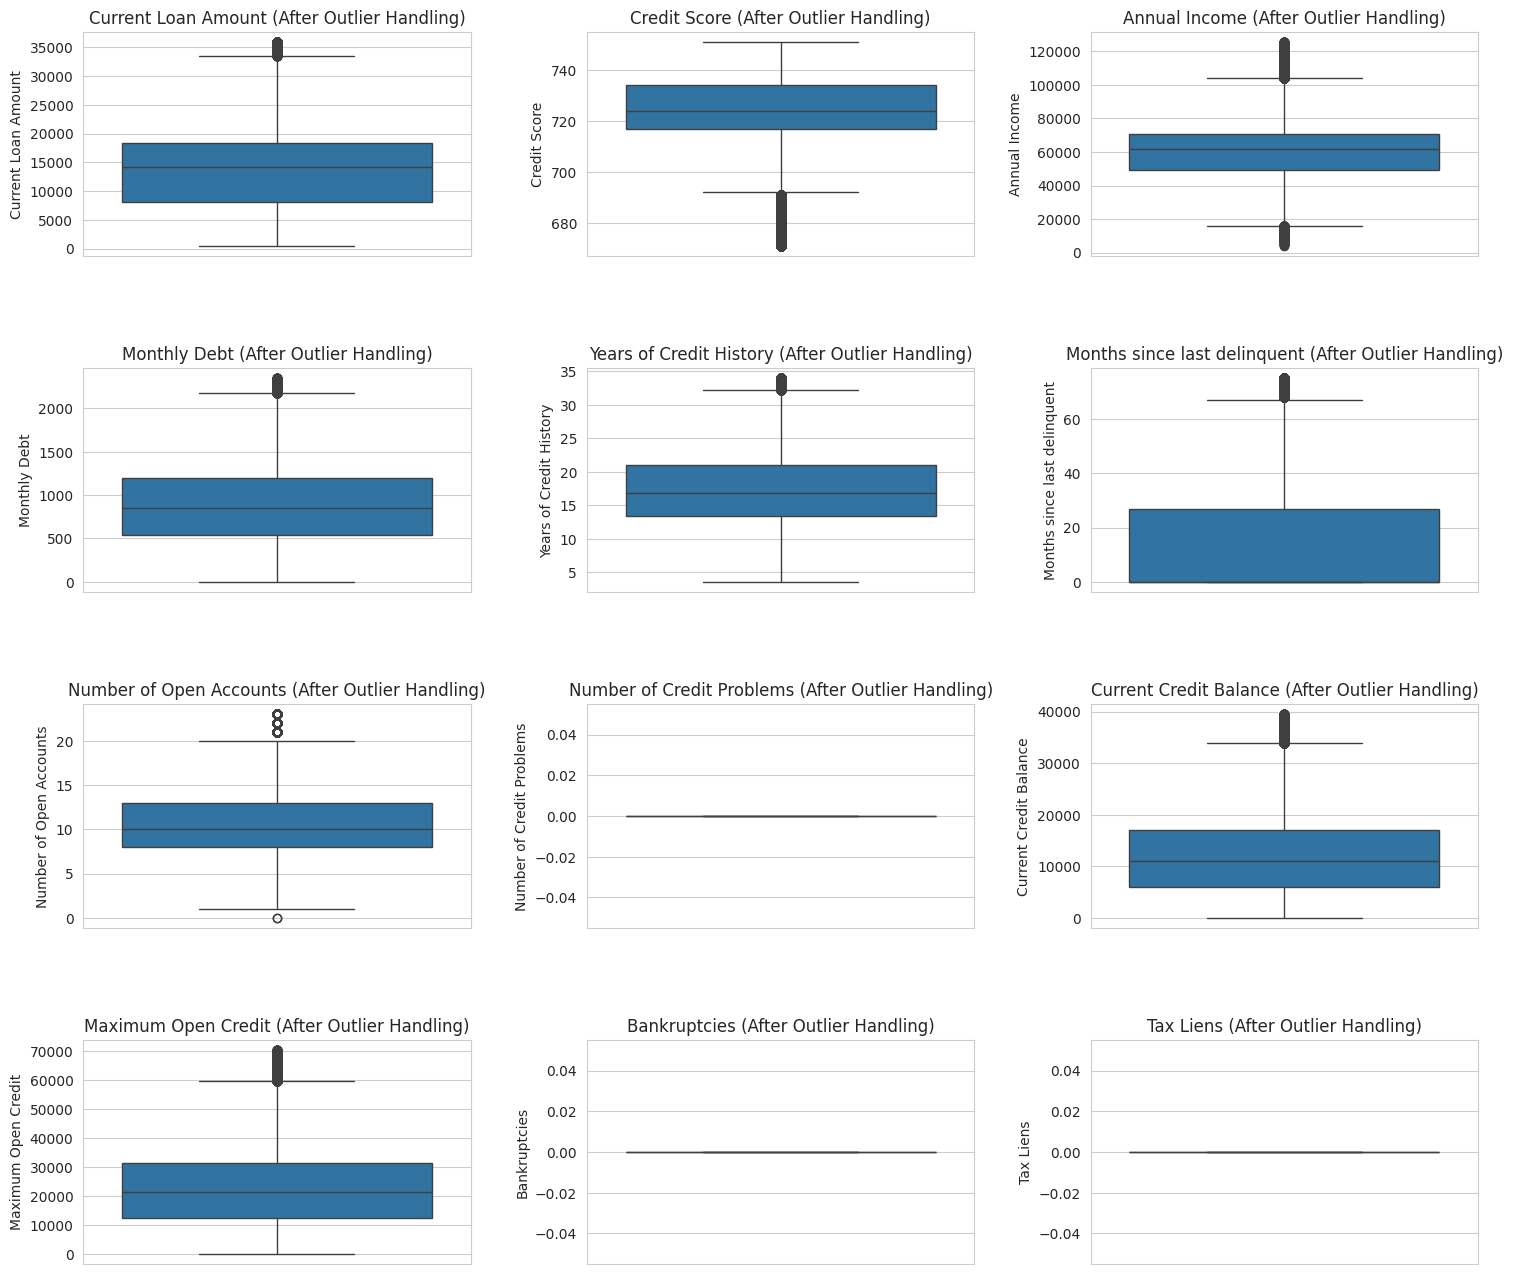

In [ ]:
# Set up a larger figure to prevent text overlapping
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Generate boxplots
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"{col} (After Outlier Handling)", fontsize=12)
    axes[i].set_ylabel(col, fontsize=10)

# Adjust layout for better readability
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Increase spacing between plots

plt.show()

The following shows basic statistics prior to outlier removal

In [ ]:
print("Percentage of Outliers in Each Column (Before Removal):")
for col, pct in outlier_counts.items():
    print(f"{col}: {pct}%")

print("\nBasic Statistics After Outlier Removal:")

Percentage of Outliers in Each Column (Before Removal):
Current Loan Amount: 11.46%
Credit Score: 10.28%
Annual Income: 6.89%
Monthly Debt: 3.4%
Years of Credit History: 3.09%
Months since last delinquent: 2.09%
Number of Open Accounts: 2.27%
Number of Credit Problems: 13.92%
Current Credit Balance: 5.18%
Maximum Open Credit: 5.73%
Bankruptcies: 11.01%
Tax Liens: 1.92%

Basic Statistics After Outlier Removal:


# Task 4:

Do perform correlation between the attributes and identify the highly correlated attributes i.e. 0.6 or higher.

Note, the fields "Number of Credit Problems", "Bankruptices", and "Tax Liens" were skipped because these fields are mostly filled with 0's, meaning values are mostly identical (especially after outlier removal). The variation in each of these fields is < 0.5, which makes it so that the correlation matrix fails to visualize the correlation between these fields and other fields.


This discussion explains it well:
https://www.kaggle.com/discussions/general/186524

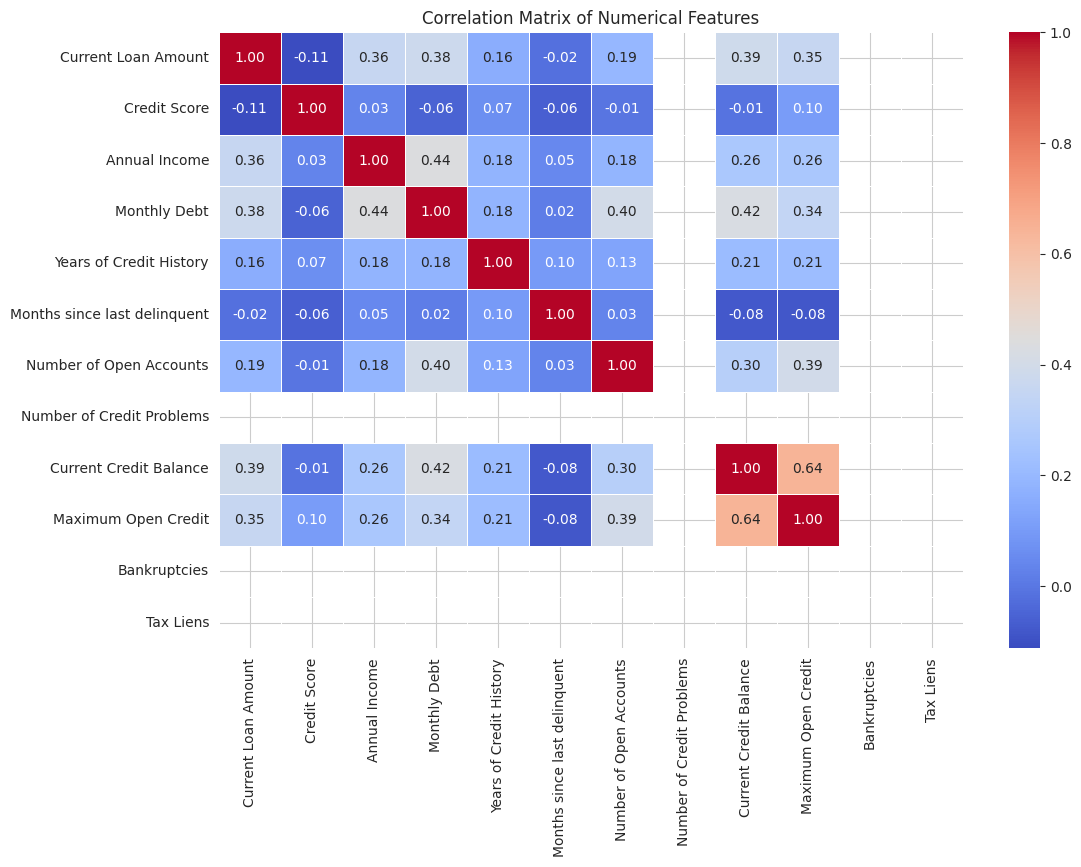

Highly Correlated Attributes (|correlation| ≥ 0.6):
                Feature 1            Feature 2  Correlation
0  Current Credit Balance  Maximum Open Credit     0.639884


In [ ]:
numeric_columns = [
    "Current Loan Amount", "Credit Score", "Annual Income", "Monthly Debt",
    "Years of Credit History", "Months since last delinquent", "Number of Open Accounts",
    "Number of Credit Problems", "Current Credit Balance", "Maximum Open Credit",
    "Bankruptcies", "Tax Liens"
]

# print(df[numeric_columns].info())

# Compute correlation matrix
correlation_matrix = df[numeric_columns].corr(method="pearson")

# Plot heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Identify highly correlated features (absolute value >= 0.6)
high_corr_pairs = []
threshold = 0.6  # Correlation threshold

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):  # Avoid duplicates
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.index[j], correlation_matrix.iloc[i, j]))

# Convert to DataFrame for readability
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
high_corr_df = high_corr_df.sort_values(by="Correlation", ascending=False)

# Display highly correlated features
print("Highly Correlated Attributes (|correlation| ≥ 0.6):")
print(high_corr_df)

# Task 5:

The ‘Year in current job’ need to be in replaced using the following highlighted format
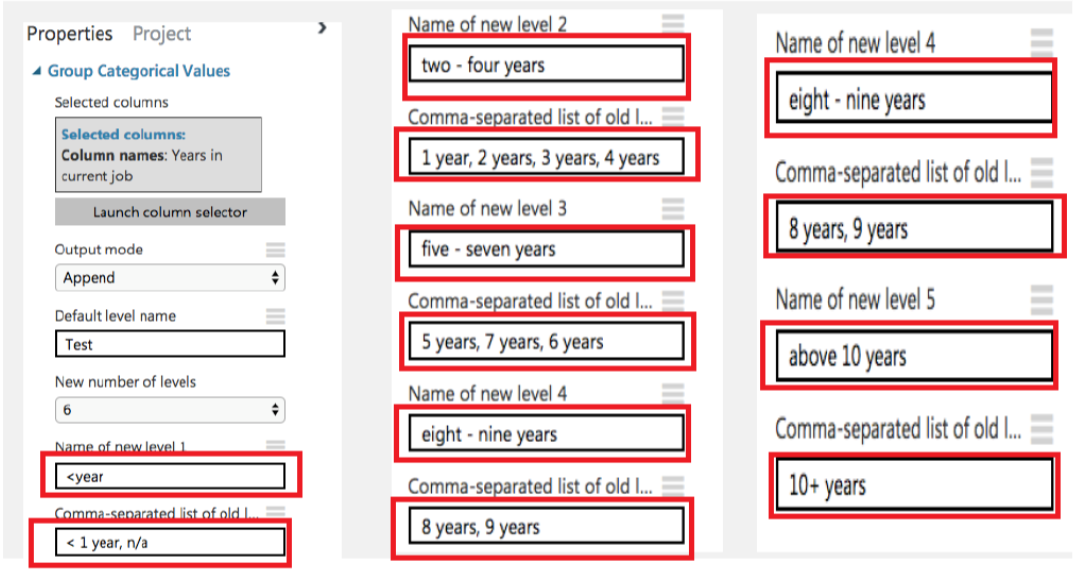

Visualization before changes:

<Axes: ylabel='Years in current job'>

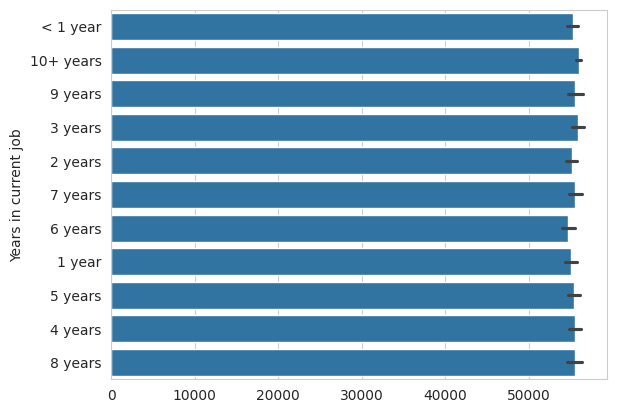

In [ ]:
sns.barplot(df['Years in current job'])

Applying changes

In [ ]:
def categorize_years(value):
    if pd.isna(value):
        return "<year"
    elif value in ["< 1 year", "n/a"]:
        return "<year"
    elif value in ["1 year", "2 years", "3 years", "4 years"]:
        return "two - four years"
    elif value in ["5 years", "6 years", "7 years"]:
        return "five - seven years"
    elif value in ["8 years", "9 years"]:
        return "eight - nine years"
    elif value in ["10+ years"]:
        return "above 10 years"
    else:
        return "unknown"

# Apply transformation
df["Years in current job"] = df["Years in current job"].apply(categorize_years)

Visualization after changes:

<Axes: ylabel='Years in current job'>

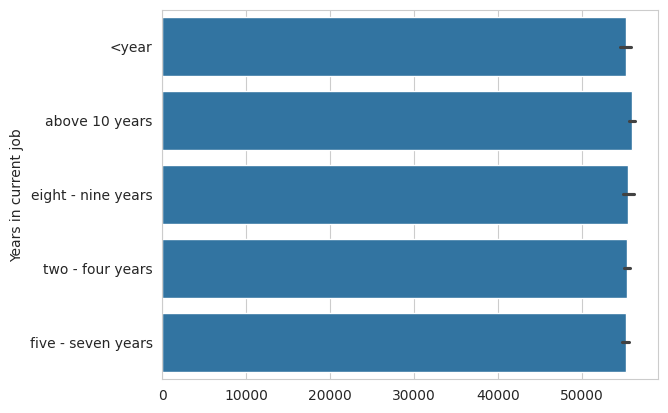

In [ ]:
sns.barplot(df['Years in current job'])